# Explore here

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pickle import dump


In [4]:
train_data = pd.read_csv("https://raw.githubusercontent.com/pdeleonsoria/Decission-tree/main/data/processed/clean_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/pdeleonsoria/Decission-tree/main/data/processed/clean_test.csv")

In [5]:
train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


In [6]:
test_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0,0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0,0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0,0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0,0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0,0


In [7]:
#SEPARAR EN TRAIN Y TEST 
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [8]:
#GENERAR RANDOM FOREST RandomForestClassifier(n_estimators= , max_depth= , random_state=42)

n_estimators_valores = [10, 25, 40, 55, 70, 85, 100] 
max_depth_valores = [1, 5, 10,15, 20]    

resultados = []

for n_estimators in n_estimators_valores:
    for max_depth in max_depth_valores:
       
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_test)
        
        exactitud = accuracy_score(y_test, y_pred)
        resultados.append((n_estimators, max_depth, exactitud))
        
resultados_df = pd.DataFrame(resultados, columns=["n_estimators", "max_depth", "exactitud",])

print (resultados_df)

    n_estimators  max_depth  exactitud
0             10          1   0.779221
1             10          5   0.792208
2             10         10   0.688312
3             10         15   0.727273
4             10         20   0.740260
5             25          1   0.766234
6             25          5   0.759740
7             25         10   0.727273
8             25         15   0.746753
9             25         20   0.759740
10            40          1   0.714286
11            40          5   0.753247
12            40         10   0.746753
13            40         15   0.746753
14            40         20   0.753247
15            55          1   0.714286
16            55          5   0.727273
17            55         10   0.766234
18            55         15   0.772727
19            55         20   0.759740
20            70          1   0.720779
21            70          5   0.746753
22            70         10   0.759740
23            70         15   0.759740
24            70         

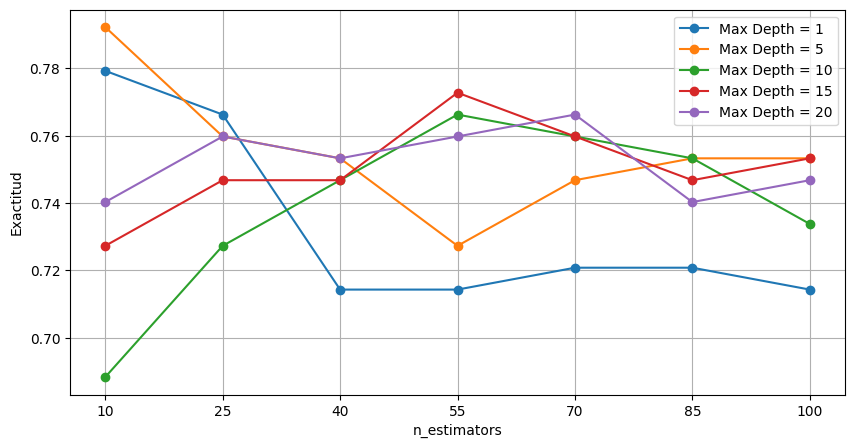

In [9]:
md1 = resultados_df[resultados_df["max_depth"] == 1]
md5 = resultados_df[resultados_df["max_depth"] == 5]
md10 = resultados_df[resultados_df["max_depth"] == 10]
md15 = resultados_df[resultados_df["max_depth"] == 15]
md20 = resultados_df[resultados_df["max_depth"] == 20]

plt.figure(figsize=(10, 5))
plt.plot(md1["n_estimators"], md1["exactitud"], marker="o", label="Max Depth = 1")
plt.plot(md5["n_estimators"], md5["exactitud"], marker="o", label="Max Depth = 5")
plt.plot(md10["n_estimators"], md10["exactitud"], marker="o", label="Max Depth = 10")
plt.plot(md15["n_estimators"], md15["exactitud"], marker="o", label="Max Depth = 15")
plt.plot(md20["n_estimators"], md20["exactitud"], marker="o", label="Max Depth = 20")

plt.xticks(n_estimators_valores)
plt.xlabel("n_estimators")
plt.ylabel("Exactitud")
plt.legend()
plt.grid()
plt.show()



In [10]:
#ENTRENAR EL MODELO CON LOS MEJORES HIPERPARMATROS: n_estimators= 10, max_depth= 5 Y MÉTRICAS 

modelo_opti1 = RandomForestClassifier(n_estimators = 10, max_depth = 5, random_state=42)
modelo_opti1.fit(X_train, y_train)

y_pred = modelo_opti1.predict(X_test)
y_pred

accuracy_score(y_test, y_pred)

0.7922077922077922

Aunque este de el mejor valor de accuracy, me parece que es un random forest con muy pocos árboles, por lo que también incluyo los segundos mejores resultados. No se si estaría bien hacerlo así

In [14]:
#ENTRENAR EL MODELO CON LOS SEGUNDOS MEJORES HIPERPARMATROS: n_estimators= 55, max_depth= 15 Y MÉTRICAS 

modelo_opti2 = RandomForestClassifier(n_estimators = 55, max_depth = 15, random_state=42)
modelo_opti2.fit(X_train, y_train)

y_pred = modelo_opti2.predict(X_test)
y_pred

accuracy_score(y_test, y_pred)

0.7727272727272727

Los valores más altos de exactitud los encontramos en los RF de 10 árboles, pero pueden ser poco árboles para un RF. La mejor exactitud siguiiente la encontramos con 55 árboles con una profundidad máxima = 15

In [11]:
#GUARDAR

dump(resultados_df, open("../models/random_forest_n_55_exact_15.sav", "wb"))